In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
tanzania_train_df = pd.read_csv('training_set_values.csv')
tanzania_train_labels_df = pd.read_csv('training_set_labels.csv')
tanzania_test_df = pd.read_csv('test_set_values.csv')
tanzania_submission_df = pd.read_csv('submission_format.csv')

In [5]:
tanzania_train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
tanzania_train_labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
train = tanzania_train_df.merge(tanzania_train_labels_df, on='id', how='right')
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
tanzania_test_df['status_group'] = 'unknown'

In [9]:
tanzania_test_df.shape

(14850, 41)

In [10]:
tanzania_test_df['status_group'].value_counts()

unknown    14850
Name: status_group, dtype: int64

In [11]:
tanzania_train_set_df = train.append(tanzania_test_df, ignore_index=True, sort=False)

In [12]:
tanzania_train_set_df.shape

(74250, 41)

In [13]:
tanzania_train_set_df.isnull()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74247,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


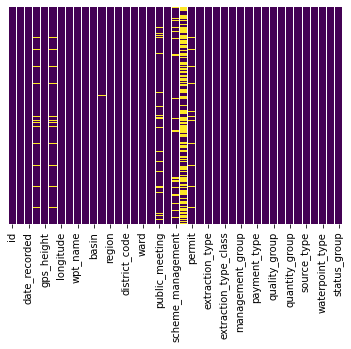

In [14]:
sns.heatmap(tanzania_train_set_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [15]:
tanzania_train_set_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [16]:
tanzania_train_set_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Text(0.5, 1.0, 'Target Histogram')

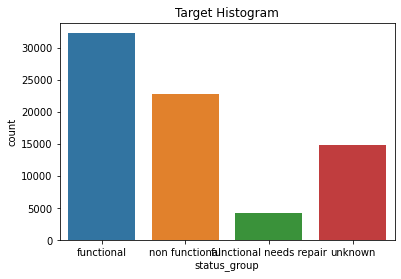

In [17]:
sns.countplot(x='status_group', data=tanzania_train_set_df)
plt.title('Target Histogram')

In [18]:
tanzania_train_set_df['water_quality'].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [19]:
tanzania_train_set_df['quality_group'].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

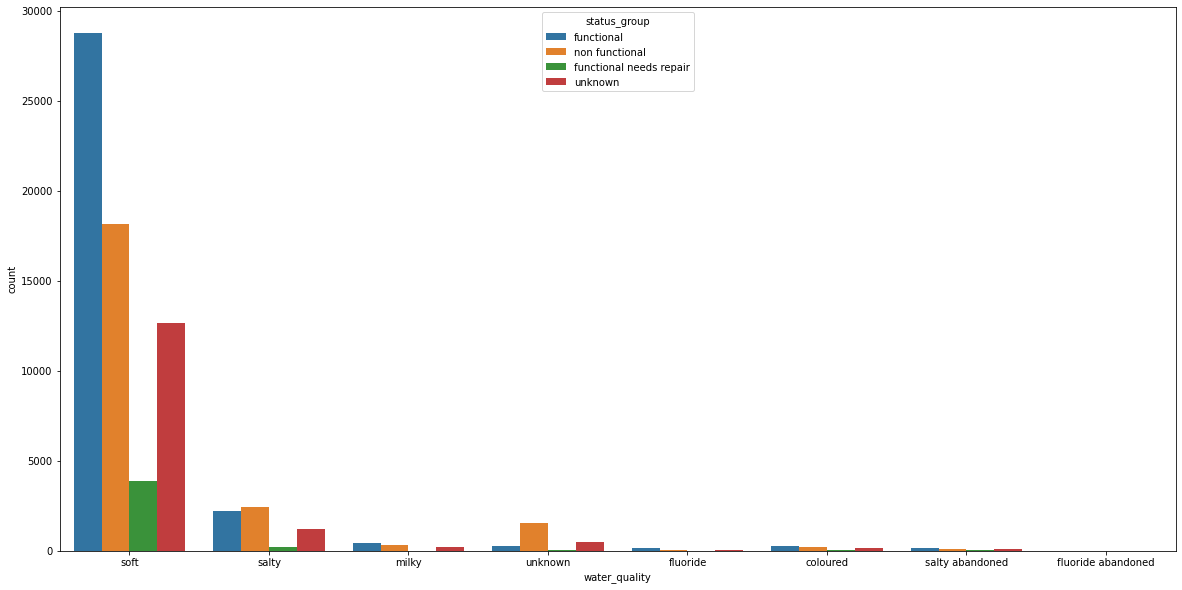

In [20]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=tanzania_train_set_df)

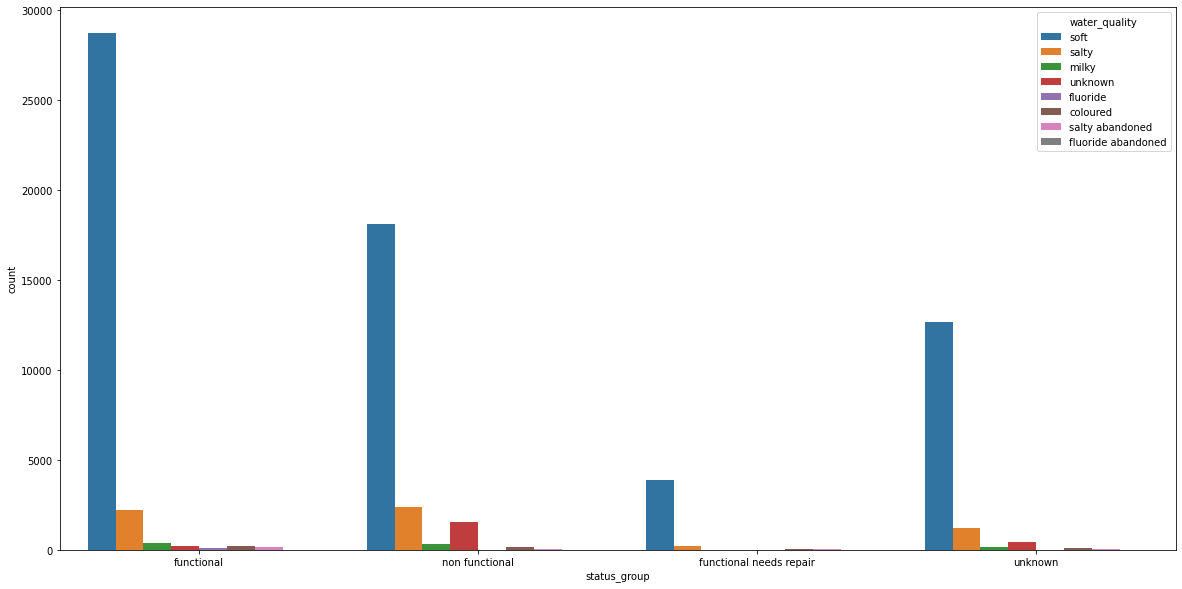

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=tanzania_train_set_df)

In [22]:
tanzania_train_set_df['quantity'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

In [23]:
tanzania_train_set_df['quantity_group'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64

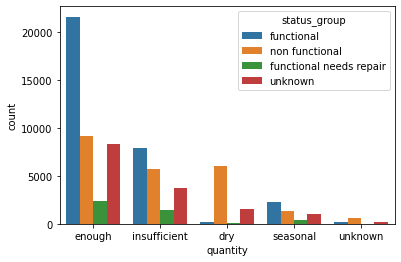

In [24]:
ax = sns.countplot(x='quantity', hue="status_group", data=tanzania_train_set_df)

In [25]:
tanzania_train_set_df['waterpoint_type'].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64

In [26]:
tanzania_train_set_df['waterpoint_type_group'].value_counts()

communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

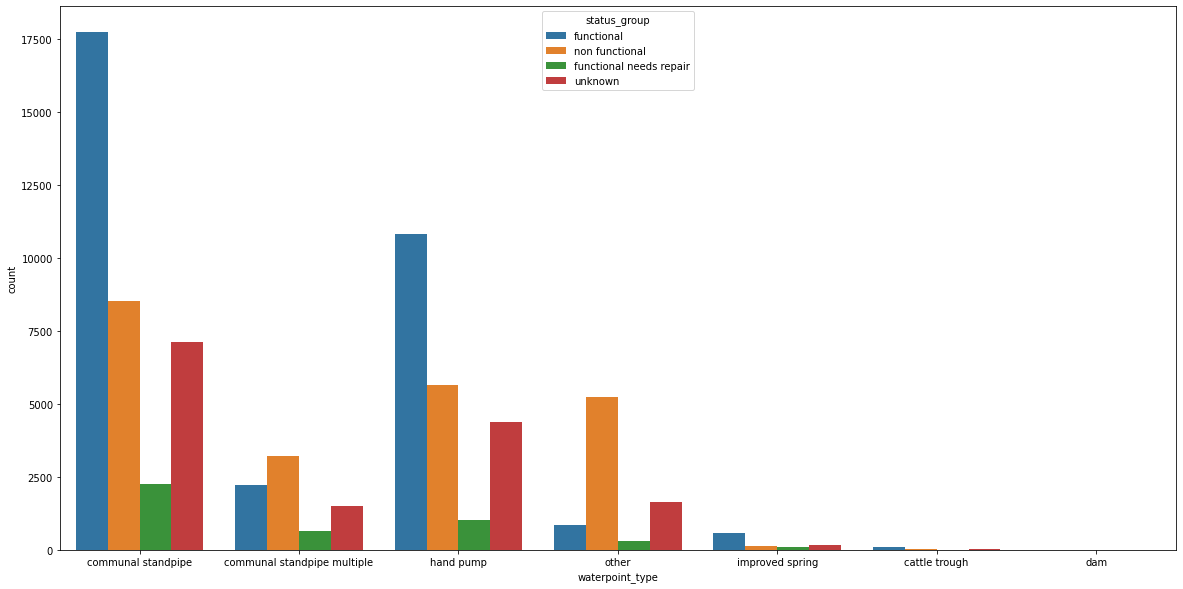

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=tanzania_train_set_df)

In [28]:
tanzania_train_set_df['payment'].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [29]:
tanzania_train_set_df['payment_type'].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

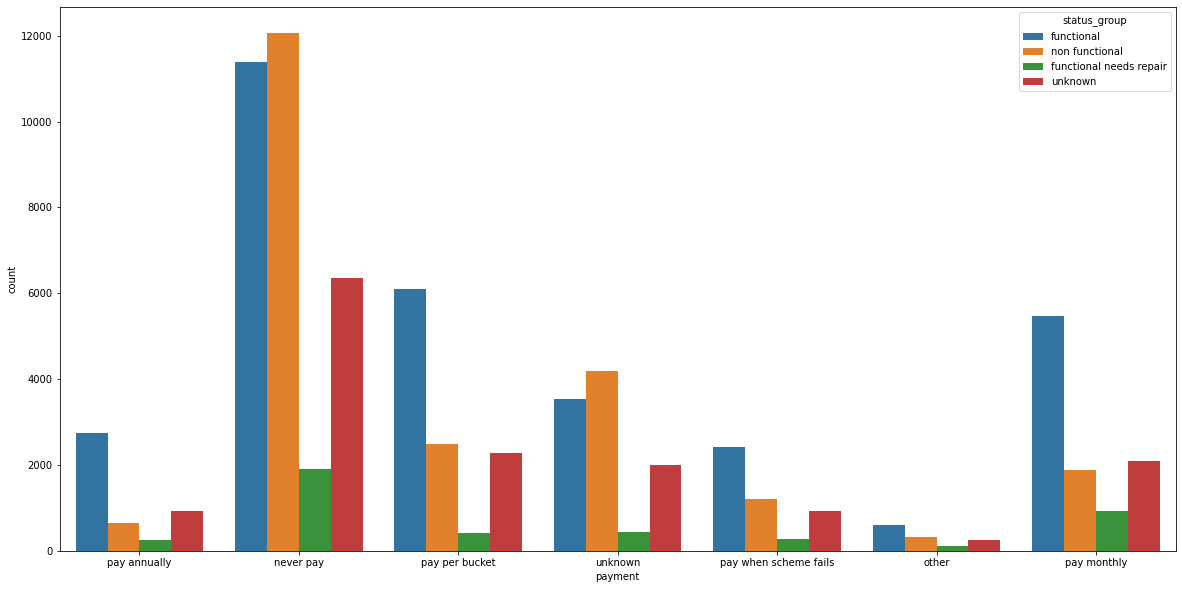

In [30]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=tanzania_train_set_df)

In [31]:
tanzania_train_set_df['source'].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [32]:
tanzania_train_set_df['source_type'].value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

In [33]:
tanzania_train_set_df['source_class'].value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [34]:
tanzania_train_set_df.groupby(['source_class','source']).count()

id  ...  status_group
source_class source                       ...              
groundwater  hand dtw               1108  ...          1108
             machine dbh           13822  ...         13822
             shallow well          21140  ...         21140
             spring                21216  ...         21216
surface      dam                     840  ...           840
             lake                    950  ...           950
             rainwater harvesting   2863  ...          2863
             river                 11964  ...         11964
unknown      other                   261  ...           261
             unknown                  86  ...            86

[10 rows x 39 columns]

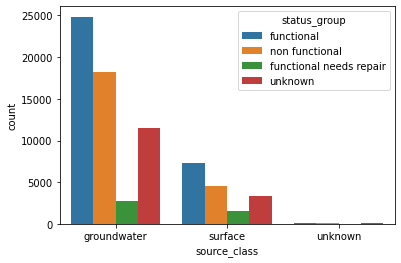

In [35]:
ax = sns.countplot(x='source_class', hue="status_group", data=tanzania_train_set_df)

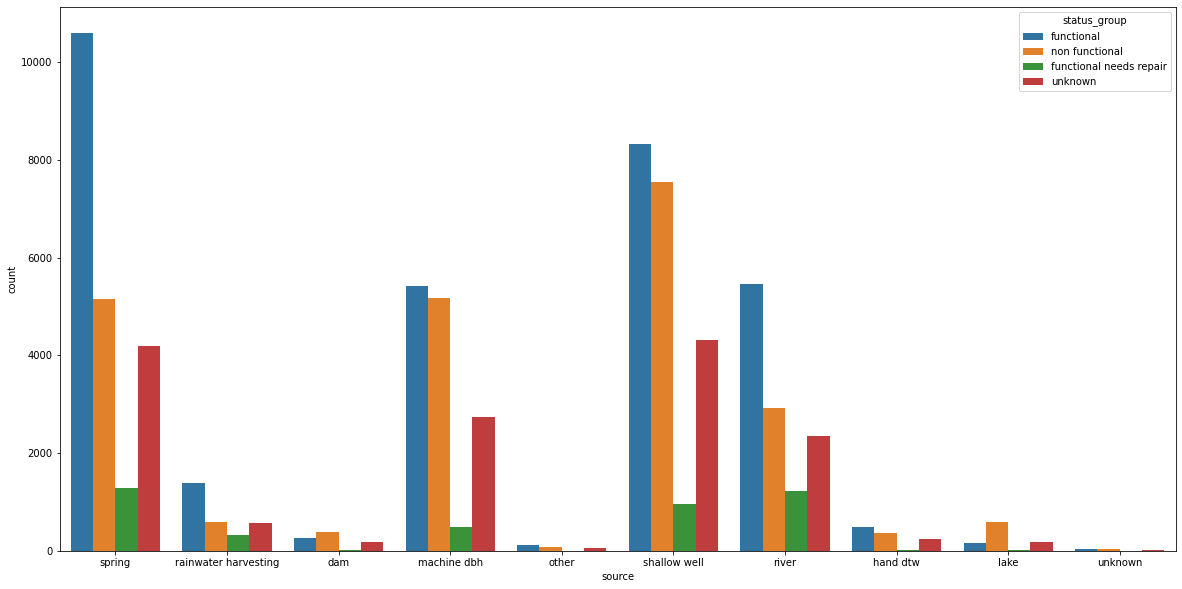

In [36]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=tanzania_train_set_df)

In [37]:
tanzania_train_set_df['extraction_type'].value_counts()

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [38]:
tanzania_train_set_df['extraction_type_class'].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [39]:
tanzania_train_set_df['extraction_type_group'].value_counts()

gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [40]:
tanzania_train_set_df.groupby(['extraction_type_class','extraction_type']).count()

id  ...  status_group
extraction_type_class extraction_type                   ...              
gravity               gravity                    33263  ...         33263
handpump              afridev                     2208  ...          2208
                      india mark ii               3029  ...          3029
                      india mark iii               135  ...           135
                      nira/tanira                10205  ...         10205
                      other - mkulima/shinyanga      2  ...             2
                      other - play pump            101  ...           101
                      other - swn 81               284  ...           284
                      swn 80                      4588  ...          4588
                      walimi                        60  ...            60
motorpump             cemo                         108  ...           108
                      climax                        41  ...            41
                      mono                        3628  ...          3628
other                 other                       8102  ...          8102
rope pump             other - rope pump            572  ...           572
submersible           ksb                         1790  ...          1790
                      submersible                 5982  ...          5982
wind-powered          windmill                     152  ...           152

[18 rows x 39 columns]

In [41]:
tanzania_train_set_df.groupby(['extraction_type_class','extraction_type_group']).count()

id  ...  status_group
extraction_type_class extraction_type_group         ...              
gravity               gravity                33263  ...         33263
handpump              afridev                 2208  ...          2208
                      india mark ii           3029  ...          3029
                      india mark iii           135  ...           135
                      nira/tanira            10205  ...         10205
                      other handpump           447  ...           447
                      swn 80                  4588  ...          4588
motorpump             mono                    3628  ...          3628
                      other motorpump          149  ...           149
other                 other                   8102  ...          8102
rope pump             rope pump                572  ...           572
submersible           submersible             7772  ...          7772
wind-powered          wind-powered             152  ...           152

[13 rows x 39 columns]

In [42]:
tanzania_train_set_df.groupby(['extraction_type_group','extraction_type']).count()

id  ...  status_group
extraction_type_group extraction_type                   ...              
afridev               afridev                     2208  ...          2208
gravity               gravity                    33263  ...         33263
india mark ii         india mark ii               3029  ...          3029
india mark iii        india mark iii               135  ...           135
mono                  mono                        3628  ...          3628
nira/tanira           nira/tanira                10205  ...         10205
other                 other                       8102  ...          8102
other handpump        other - mkulima/shinyanga      2  ...             2
                      other - play pump            101  ...           101
                      other - swn 81               284  ...           284
                      walimi                        60  ...            60
other motorpump       cemo                         108  ...           108
                      climax                        41  ...            41
rope pump             other - rope pump            572  ...           572
submersible           ksb                         1790  ...          1790
                      submersible                 5982  ...          5982
swn 80                swn 80                      4588  ...          4588
wind-powered          windmill                     152  ...           152

[18 rows x 39 columns]

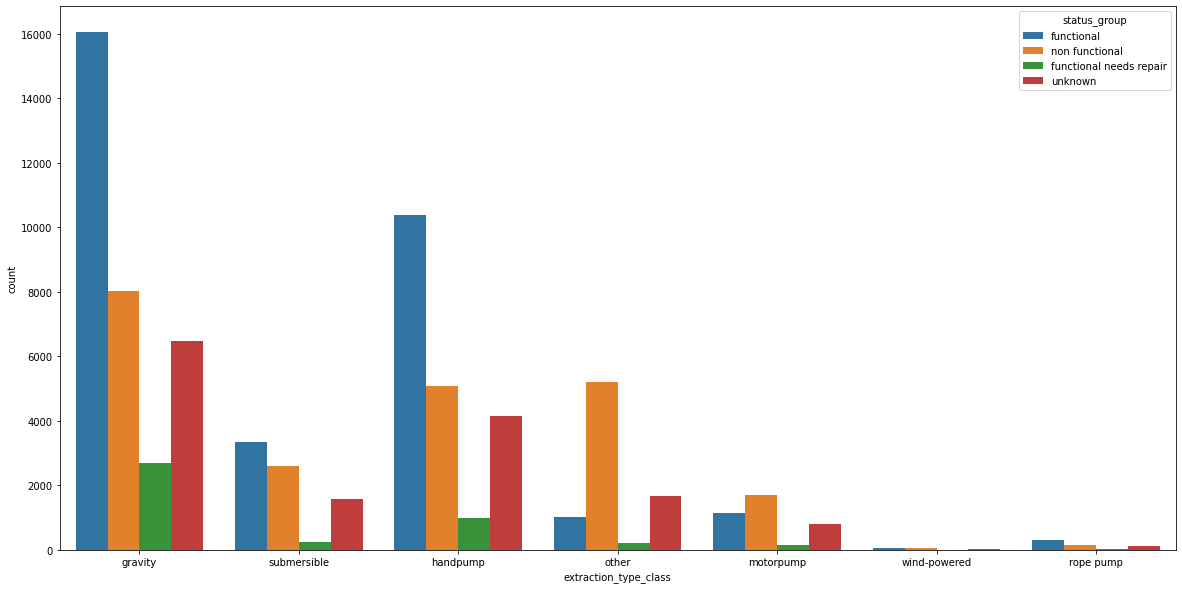

In [43]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=tanzania_train_set_df)

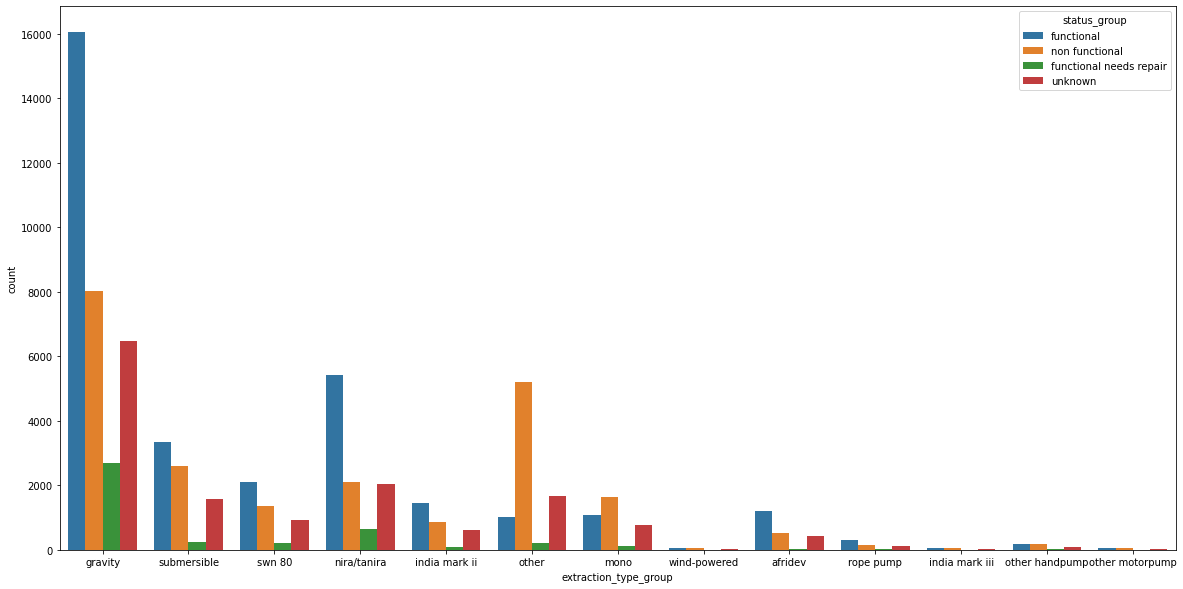

In [44]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=tanzania_train_set_df)

In [45]:
tanzania_train_set_df['scheme_management'].value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [46]:
tanzania_train_set_df['management'].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [47]:
tanzania_train_set_df['management_group'].value_counts()

user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

In [48]:
tanzania_train_set_df.groupby(['management_group','management']).count()

id  ...  status_group
management_group management               ...              
commercial       company             859  ...           859
                 private operator   2504  ...          2504
                 trust               105  ...           105
                 water authority    1123  ...          1123
other            other              1083  ...          1083
                 other - school      126  ...           126
parastatal       parastatal         2229  ...          2229
unknown          unknown             683  ...           683
user-group       vwc               50624  ...         50624
                 water board        3688  ...          3688
                 wua                3118  ...          3118
                 wug                8108  ...          8108

[12 rows x 39 columns]

In [49]:
#Dropping simlar columns
tanzania_train_set_df.drop(columns=['quality_group','quantity_group','waterpoint_type_group','payment','source_class','source_type','extraction_type_class','extraction_type','management_group','scheme_management'],inplace=True)

In [50]:
tanzania_train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [51]:
tanzania_train_set_df['num_private'].value_counts()

0      73299
1         94
6         92
5         60
8         58
       ...  
30         1
669        1
668        1
213        1
62         1
Name: num_private, Length: 68, dtype: int64

In [52]:
tanzania_train_set_df.drop(columns=['num_private'],inplace=True )

In [53]:
tanzania_train_set_df['recorded_by'].value_counts()

GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

In [54]:
tanzania_train_set_df.drop(columns=['recorded_by'],inplace=True )

In [55]:
tanzania_train_set_df['wpt_name'].value_counts()

none            4440
Shuleni         2183
Zahanati        1034
Msikitini        647
Kanisani         390
                ... 
Kwa Lipitako       1
Imalupina          1
Mratebe            1
Kekikwingili       1
Kwa Liniga         1
Name: wpt_name, Length: 45684, dtype: int64

In [57]:
tanzania_train_set_df['scheme_name'].value_counts()

K                     858
None                  794
Borehole              704
Chalinze wate         501
M                     490
                     ... 
AMRSF                   1
Sanga piped Scheme      1
Mwaboza                 1
BL Sanya                1
Sasa                    1
Name: scheme_name, Length: 2868, dtype: int64

In [58]:
tanzania_train_set_df.duplicated(subset='id', keep='first').sum()

0

In [59]:
tanzania_train_set_df.drop(columns=['wpt_name','scheme_name','id'],inplace=True)

In [60]:
tanzania_train_set_df['amount_tsh'].value_counts()

0.0       52049
500.0      3874
50.0       3103
1000.0     1858
20.0       1812
          ...  
5400.0        1
59.0          1
12.0          1
220.0         1
2550.0        1
Name: amount_tsh, Length: 102, dtype: int64

In [61]:
tanzania_train_set_df.drop(columns=['amount_tsh'],inplace=True)

In [62]:
tanzania_train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          74250 non-null  object 
 1   funder                 69746 non-null  object 
 2   gps_height             74250 non-null  int64  
 3   installer              69718 non-null  object 
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   basin                  74250 non-null  object 
 7   subvillage             73780 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  int64  
 10  district_code          74250 non-null  int64  
 11  lga                    74250 non-null  object 
 12  ward                   74250 non-null  object 
 13  population             74250 non-null  int64  
 14  public_meeting         70095 non-null  object 
 15  pe

In [63]:
tanzania_train_set_df['region'].value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

In [64]:
tanzania_train_set_df['region_code'].value_counts()

11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
4     3145
1     2779
13    2536
14    2488
20    2451
15    2242
6     2032
21    1972
80    1536
60    1298
90    1133
7     1020
99     512
9      499
24     402
8      375
40       1
Name: region_code, dtype: int64

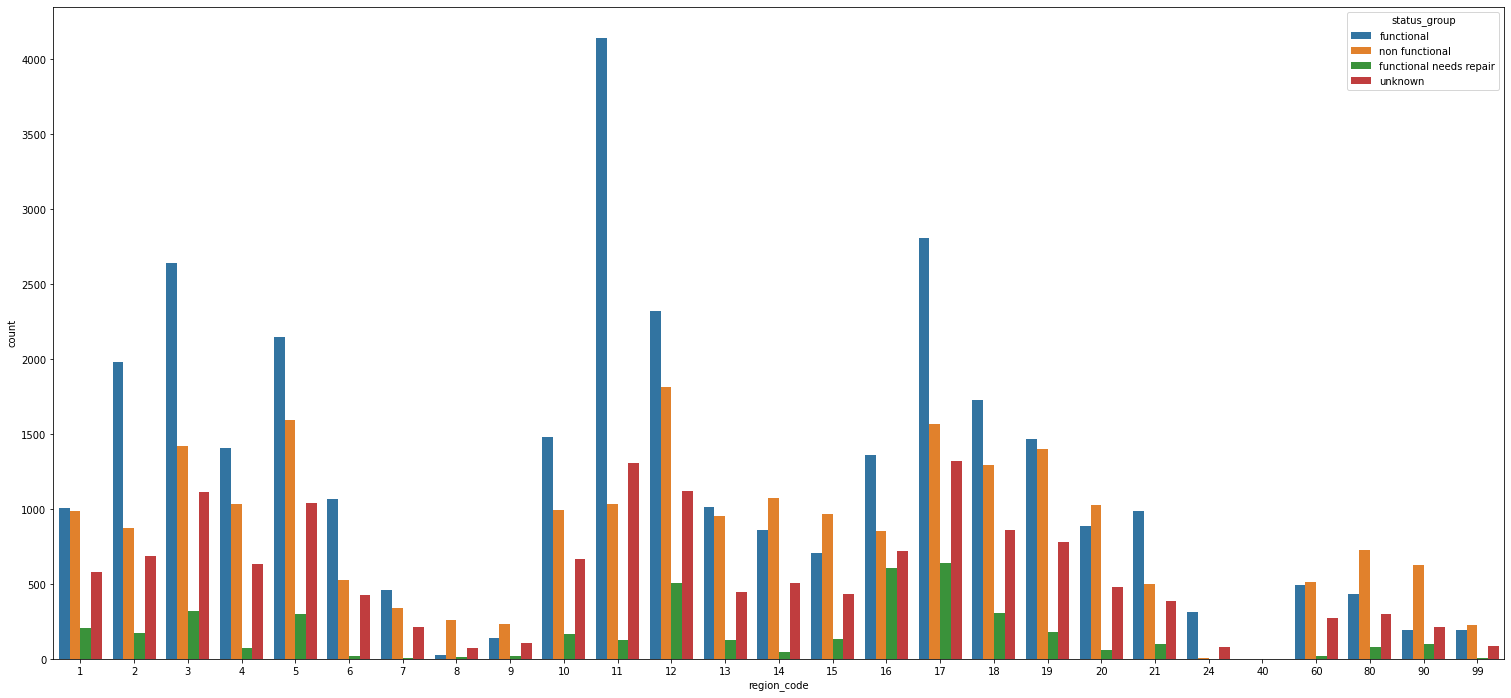

In [65]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region_code', hue="status_group", data=tanzania_train_set_df)

In [66]:
tanzania_train_set_df.drop(columns=['region'],inplace=True)

In [67]:
tanzania_train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          74250 non-null  object 
 1   funder                 69746 non-null  object 
 2   gps_height             74250 non-null  int64  
 3   installer              69718 non-null  object 
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   basin                  74250 non-null  object 
 7   subvillage             73780 non-null  object 
 8   region_code            74250 non-null  int64  
 9   district_code          74250 non-null  int64  
 10  lga                    74250 non-null  object 
 11  ward                   74250 non-null  object 
 12  population             74250 non-null  int64  
 13  public_meeting         70095 non-null  object 
 14  permit                 70457 non-null  object 
 15  co

In [68]:
tanzania_train_set_df['public_meeting'].value_counts()

True     63749
False     6346
Name: public_meeting, dtype: int64

In [69]:
tanzania_train_set_df['public_meeting'].isnull().sum()

4155

In [70]:
tanzania_train_set_df['public_meeting'].fillna(value=True,inplace=True)

In [71]:
tanzania_train_set_df['public_meeting'].isnull().sum()

0

In [72]:
tanzania_train_set_df['permit'].value_counts()

True     48606
False    21851
Name: permit, dtype: int64

In [73]:
tanzania_train_set_df['permit'].isnull().sum()

3793

In [74]:
tanzania_train_set_df['permit'].fillna(value=True,inplace=True)

In [75]:
tanzania_train_set_df['permit'].isnull().sum()

0

In [76]:
tanzania_train_set_df['population'].value_counts()

0       26834
1        8782
200      2370
150      2328
250      2087
        ...  
1193        1
593         1
1065        1
785         1
895         1
Name: population, Length: 1128, dtype: int64

In [77]:
tanzania_train_set_df.loc[tanzania_train_set_df['population']!=0].describe()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000
mean,967.471254,36.078646,-6.140993,16.032710,6.300405,283.042623,1961.912920
std,612.979582,2.587554,2.736761,21.521422,11.327183,564.413842,262.329286
min,-90.000000,29.607122,-11.649440,2.000000,1.000000,1.000000,0.000000
25%,344.000000,34.715217,-8.383484,4.000000,2.000000,40.000000,1986.000000
50%,1133.000000,36.714568,-5.765866,10.000000,3.000000,150.000000,2000.000000
75%,1461.000000,37.949838,-3.600882,16.000000,5.000000,328.000000,2008.000000
max,2777.000000,40.345193,-1.042375,99.000000,67.000000,30500.000000,2013.000000


In [78]:
tanzania_train_set_df['population'].replace(to_replace = 0 , value =283, inplace=True)

In [79]:
tanzania_train_set_df['gps_height'].value_counts()

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2457        1
 2091        1
 2536        1
 2408        1
 2015        1
Name: gps_height, Length: 2456, dtype: int64

In [80]:
tanzania_train_set_df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774
unknown,655.147609


In [81]:
tanzania_train_set_df['longitude'].value_counts()

0.000000     2269
37.250111       2
32.996093       2
37.541579       2
32.993683       2
             ... 
31.703094       1
34.258922       1
36.922075       1
40.106777       1
39.077079       1
Name: longitude, Length: 71870, dtype: int64

In [82]:
tanzania_train_set_df.loc[tanzania_train_set_df['longitude']!=0].describe() 

,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000
mean,686.650616,35.148358,-5.881503,15.185091,5.728248,283.028077,1339.394090
std,693.280413,2.608924,2.808758,17.775842,9.768536,458.088735,938.475708
min,-90.000000,29.607122,-11.649440,1.000000,0.000000,1.000000,0.000000
25%,0.000000,33.277747,-8.632576,5.000000,2.000000,90.000000,0.000000
50%,418.000000,35.007072,-5.173950,12.000000,3.000000,283.000000,1988.000000
75%,1330.000000,37.237383,-3.371872,17.000000,5.000000,283.000000,2005.000000
max,2777.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000,2013.000000


In [83]:
tanzania_train_set_df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

In [84]:
tanzania_train_set_df['longitude'].value_counts()

35.150000    2269
39.088576       2
37.274352       2
37.236680       2
37.530515       2
             ... 
34.258922       1
36.922075       1
40.106777       1
36.882744       1
35.005922       1
Name: longitude, Length: 71870, dtype: int64

In [85]:
tanzania_train_set_df['latitude'].value_counts()

-2.000000e-08    2269
-6.980122e+00       2
-6.980779e+00       2
-2.467137e+00       2
-6.964468e+00       2
                 ... 
-4.826187e+00       1
-3.424444e+00       1
-2.850875e+00       1
-4.178347e+00       1
-3.024882e+00       1
Name: latitude, Length: 71869, dtype: int64

In [86]:
tanzania_train_set_df['construction_year'].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [87]:
tanzania_train_set_df['decade'] = tanzania_train_set_df['construction_year']

In [88]:
tanzania_train_set_df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969), value ='60s' , inplace=True)
tanzania_train_set_df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979), value ='70s' , inplace=True)
tanzania_train_set_df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989), value ='80s' , inplace=True)
tanzania_train_set_df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999), value ='90s' , inplace=True)
tanzania_train_set_df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009), value ='00s' , inplace=True)
tanzania_train_set_df['decade'].replace(to_replace = (2010,2011,2012,2013), value ='10s' , inplace=True)

In [89]:
tanzania_train_set_df['decade'].value_counts()

0      25969
00s    19163
90s     9611
80s     6939
10s     6461
70s     5448
60s      659
Name: decade, dtype: int64

In [90]:
tanzania_train_set_df.loc[tanzania_train_set_df['construction_year']!=0].describe()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000
mean,1000.202709,35.986840,-6.237147,15.669559,5.967006,281.513370,1996.870943
std,618.538809,2.559941,2.760997,20.937445,10.709279,549.893368,12.440524
min,-63.000000,29.607122,-11.649440,2.000000,1.000000,1.000000,1960.000000
25%,369.000000,34.676387,-8.744394,4.000000,2.000000,40.000000,1988.000000
50%,1153.000000,36.653857,-6.078797,10.000000,3.000000,150.000000,2000.000000
75%,1486.000000,37.814225,-3.654467,16.000000,5.000000,312.000000,2008.000000
max,2777.000000,40.345193,-1.042375,99.000000,63.000000,30500.000000,2013.000000


In [91]:
tanzania_train_set_df['decade'].replace(to_replace = 0, value = '00s', inplace=True)

In [92]:
tanzania_train_set_df['decade'].value_counts()

00s    45132
90s     9611
80s     6939
10s     6461
70s     5448
60s      659
Name: decade, dtype: int64

In [93]:
tanzania_train_set_df.drop(columns=['construction_year'],inplace=True )

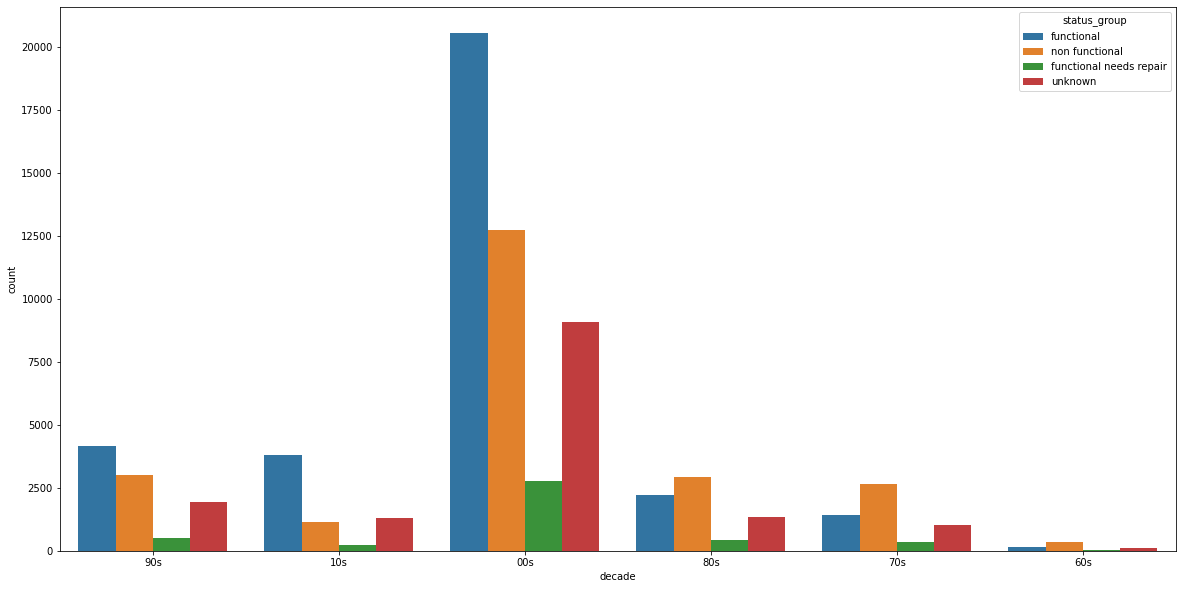

In [94]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=tanzania_train_set_df)

In [95]:
tanzania_train_set_df['date_recorded'].value_counts()

2011-03-17    695
2011-03-15    694
2013-02-03    684
2011-03-16    650
2011-03-14    649
             ... 
2011-09-22      1
2011-09-18      1
2011-09-27      1
2011-09-02      1
2013-01-01      1
Name: date_recorded, Length: 369, dtype: int64

In [96]:
tanzania_train_set_df.drop(columns=['date_recorded'],inplace=True )

In [97]:
tanzania_train_set_df['basin'].value_counts()

Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

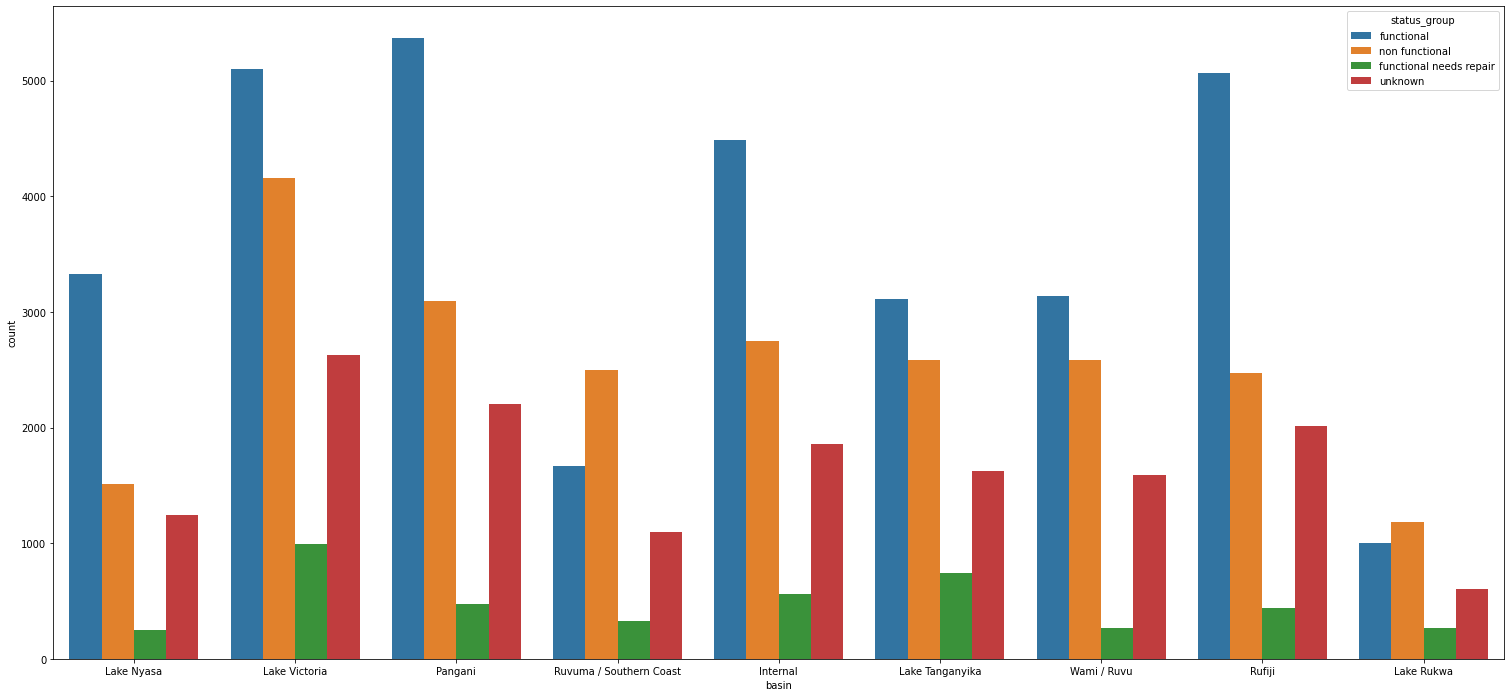

In [98]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=tanzania_train_set_df)

In [99]:
tanzania_train_set_df['subvillage'].value_counts()

Shuleni      646
Majengo      631
Madukani     629
Kati         467
Mtakuja      322
            ... 
Mwanguhi       1
Mtezi          1
Ajida          1
Mwaseri B      1
Muzinga B      1
Name: subvillage, Length: 21425, dtype: int64

In [100]:
tanzania_train_set_df['subvillage'].nunique()

21425

In [101]:
tanzania_train_set_df.drop(columns=['subvillage'],inplace=True )

In [102]:
tanzania_train_set_df['district_code'].value_counts()

1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64

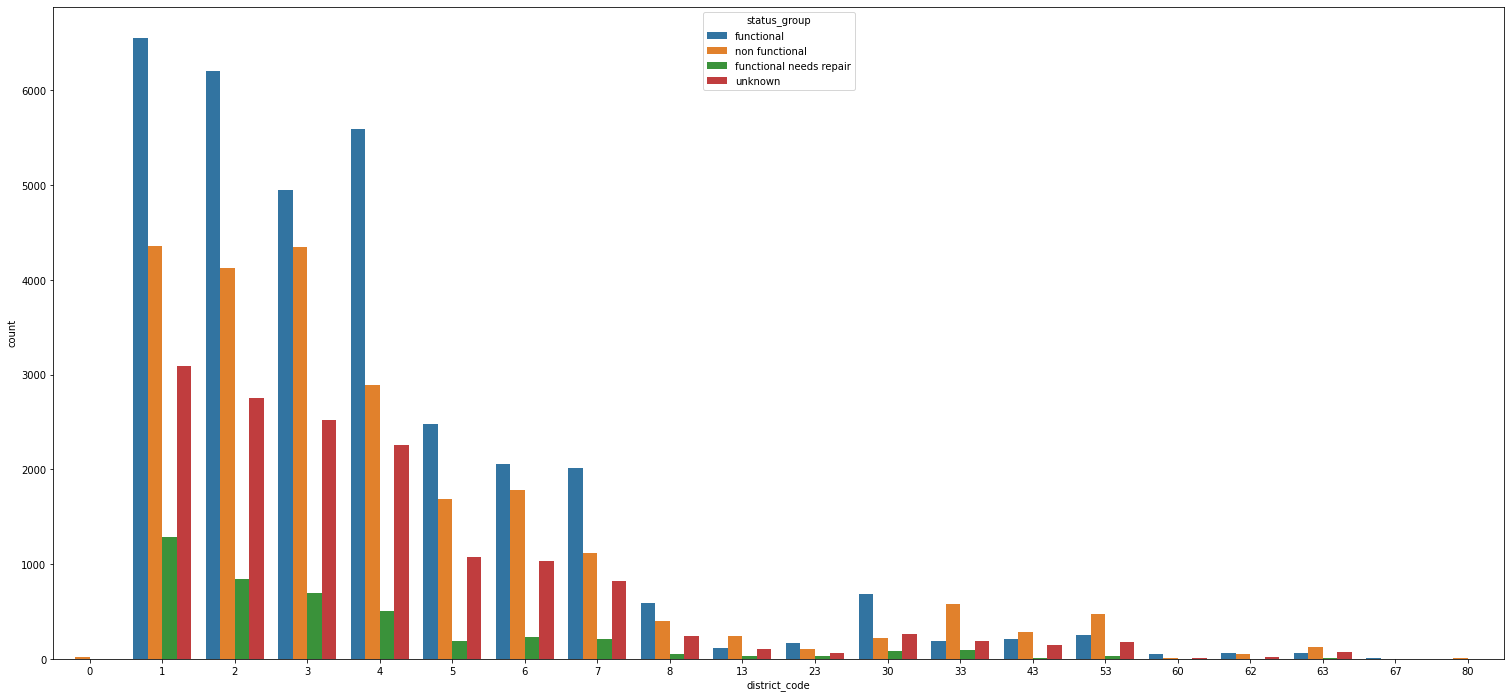

In [103]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=tanzania_train_set_df)

In [104]:
tanzania_train_set_df['region_code'].value_counts()

11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
4     3145
1     2779
13    2536
14    2488
20    2451
15    2242
6     2032
21    1972
80    1536
60    1298
90    1133
7     1020
99     512
9      499
24     402
8      375
40       1
Name: region_code, dtype: int64

In [105]:
tanzania_train_set_df['installer'].value_counts()

DWE                 21751
Government           2282
RWE                  1498
Commu                1347
DANIDA               1305
                    ...  
FINI Water              1
local technitian        1
plan int                1
CEFA/rc church          1
NGINIL                  1
Name: installer, Length: 2410, dtype: int64

In [106]:
tanzania_train_set_df['installer'].fillna(value='Unknown',inplace=True) 

In [107]:
tanzania_train_set_df['installer'].value_counts().head(50)

DWE                           21751
Unknown                        4536
Government                     2282
RWE                            1498
Commu                          1347
DANIDA                         1305
KKKT                           1120
Hesawa                         1070
0                               980
TCRS                            887
CES                             765
Central government              764
DANID                           690
Community                       687
HESAWA                          679
District Council                663
World vision                    517
TASAF                           504
LGA                             501
WEDECO                          496
District council                490
Gover                           483
AMREF                           398
TWESA                           395
WU                              377
Dmdd                            356
ACRA                            346
World Vision                

In [108]:
tanzania_train_set_df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) 

In [109]:
tanzania_train_set_df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'), value ='District water department' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci','District Council','Council','Counc','District  Council','Distri'), value ='District council' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church','RC CATHORIC',) , value ='RC Church' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Central Government','Tanzania Government','central government','Cental Government', 'Cebtral Government','Tanzanian Government','Tanzania government', 'Centra Government','CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr','Centra govt') , value ='Central government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'), value ='world vision' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi','Village Council','Village Counil', 'Villages', 'Vill', 'Village community','Villaers', 'Village Community', 'Villag','Villege Council', 'Village council','Village  Council','Villagerd', 'Villager', 'Village Technician','Village Office','Village community members'), value ='villagers' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY'), value ='Community' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove','Governme','Governmen' ), value ='Government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)

tanzania_train_set_df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [110]:
tanzania_train_set_df['installer'].value_counts().head(50)

DWE                           21751
Unknown                        5516
Government                     3337
Community                      2112
DANIDA                         1995
HESAWA                         1749
RWE                            1498
District council               1449
Central government             1359
KKKT                           1120
TCRS                            887
world vision                    846
CES                             765
Fini Water                      732
RC Church                       586
villagers                       514
TASAF                           504
LGA                             501
WEDECO                          496
Unicef                          421
AMREF                           398
TWESA                           395
WU                              377
Dmdd                            356
ACRA                            346
SEMA                            311
DW                              308
Jaica                       

In [111]:
df_1 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'DWE']
df_2 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'Unknown']              
df_3 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'Government'] 
df_4 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'Community'] 
df_5 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'DANIDA'] 
df_6 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'RWE'] 
df_7 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'District council'] 
df_8 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'Central government']
df_9 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'KKKT'] 
df_10 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'HESAWA'] 
df_11 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'TCRS'] 
df_12 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'world vision'] 
df_13 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'CES'] 
df_14 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'Fini Water'] 
df_15 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'RC Church'] 
df_16 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'villagers']
df_17 = tanzania_train_set_df.loc[tanzania_train_set_df['installer']== 'LGA']

installer_df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17], ignore_index=True)

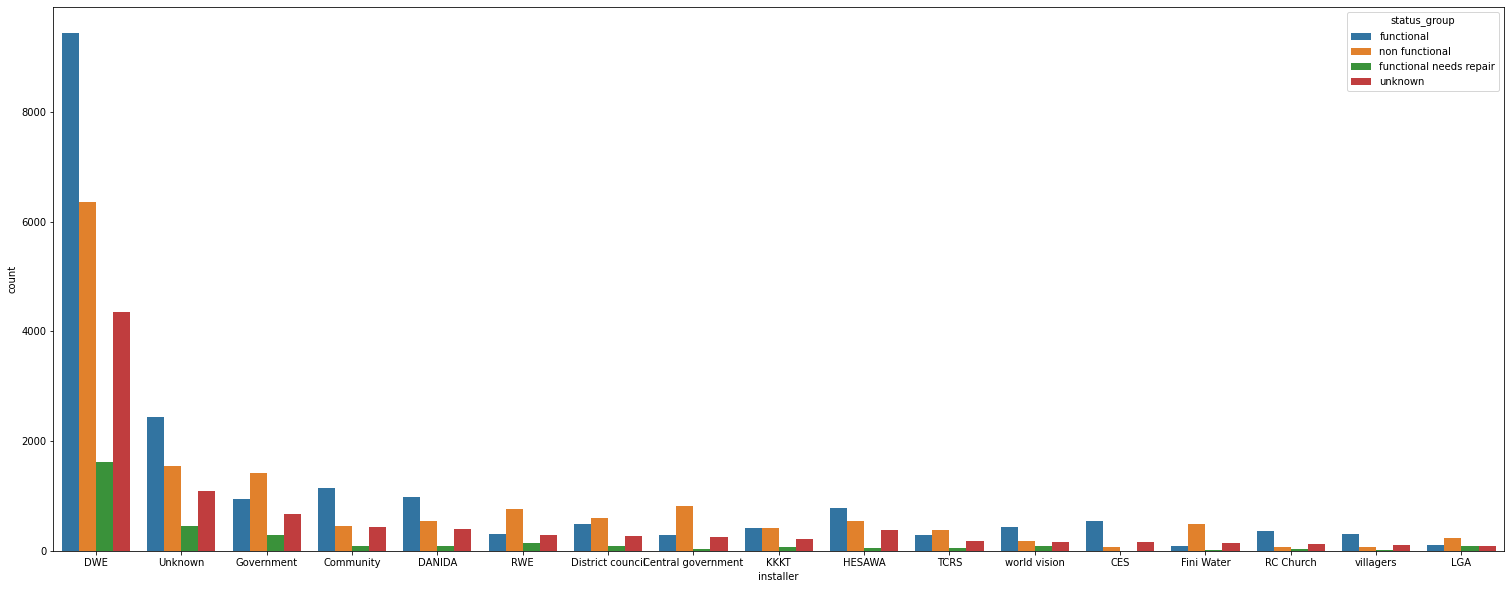

In [112]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=installer_df)

In [113]:
tanzania_train_set_df['categorized_installer'] = tanzania_train_set_df['installer']

In [114]:
tanzania_train_set_df.loc[~tanzania_train_set_df["categorized_installer"].isin(['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government','KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']), "categorized_installer"] = "Others"

In [115]:
tanzania_train_set_df['funder'].value_counts()

Government Of Tanzania     11299
Danida                      3907
Hesawa                      2782
Rwssp                       1703
World Bank                  1701
                           ...  
M And P                        1
Dimon                          1
Internal Drainage Basin        1
Amrefe                         1
Pema                           1
Name: funder, Length: 2140, dtype: int64

In [116]:
tanzania_train_set_df['funder'].fillna(value='Unknown',inplace=True) 

In [117]:
tanzania_train_set_df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True) 

In [118]:
tanzania_train_set_df['funder'].value_counts().head(50)

Government Of Tanzania            11299
Unknown                            5489
Danida                             3907
Hesawa                             2782
Rwssp                              1703
World Bank                         1701
Kkkt                               1623
World Vision                       1562
Unicef                             1324
Tasaf                              1136
Dhv                                1065
District Council                   1037
Private Individual                 1034
Dwsp                               1012
Norad                               949
Germany Republi                     765
Water                               739
Tcrs                                735
Ministry Of Water                   728
Dwe                                 605
Netherlands                         592
Hifab                               577
Adb                                 551
Lga                                 546
Amref                               525


In [119]:
df_1 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Government Of Tanzania']
df_2 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Unknown']              
df_3 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Danida'] 
df_4 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Hesawa'] 
df_5 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Rwssp'] 
df_6 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'World Bank'] 
df_7 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Kkkt'] 
df_8 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'World Vision']
df_9 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Unicef'] 
df_10 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Tasaf'] 
df_11 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'District Council'] 
df_12 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Dhv'] 
df_13 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Private Individual'] 
df_14 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Dwsp'] 
df_15 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Norad'] 
df_16 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Germany Republi']
df_17 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Tcrs']
df_18 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Ministry Of Water']
df_19 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Water']
df_20 = tanzania_train_set_df.loc[tanzania_train_set_df['funder']== 'Dwe']

funder_df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Danida'),
 Text(0, 0, 'Hesawa'),
 Text(0, 0, 'Rwssp'),
 Text(0, 0, 'World Bank'),
 Text(0, 0, 'Kkkt'),
 Text(0, 0, 'World Vision'),
 Text(0, 0, 'Unicef'),
 Text(0, 0, 'Tasaf'),
 Text(0, 0, 'District Council'),
 Text(0, 0, 'Dhv'),
 Text(0, 0, 'Private Individual'),
 Text(0, 0, 'Dwsp'),
 Text(0, 0, 'Norad'),
 Text(0, 0, 'Germany Republi'),
 Text(0, 0, 'Tcrs'),
 Text(0, 0, 'Ministry Of Water'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Dwe')]

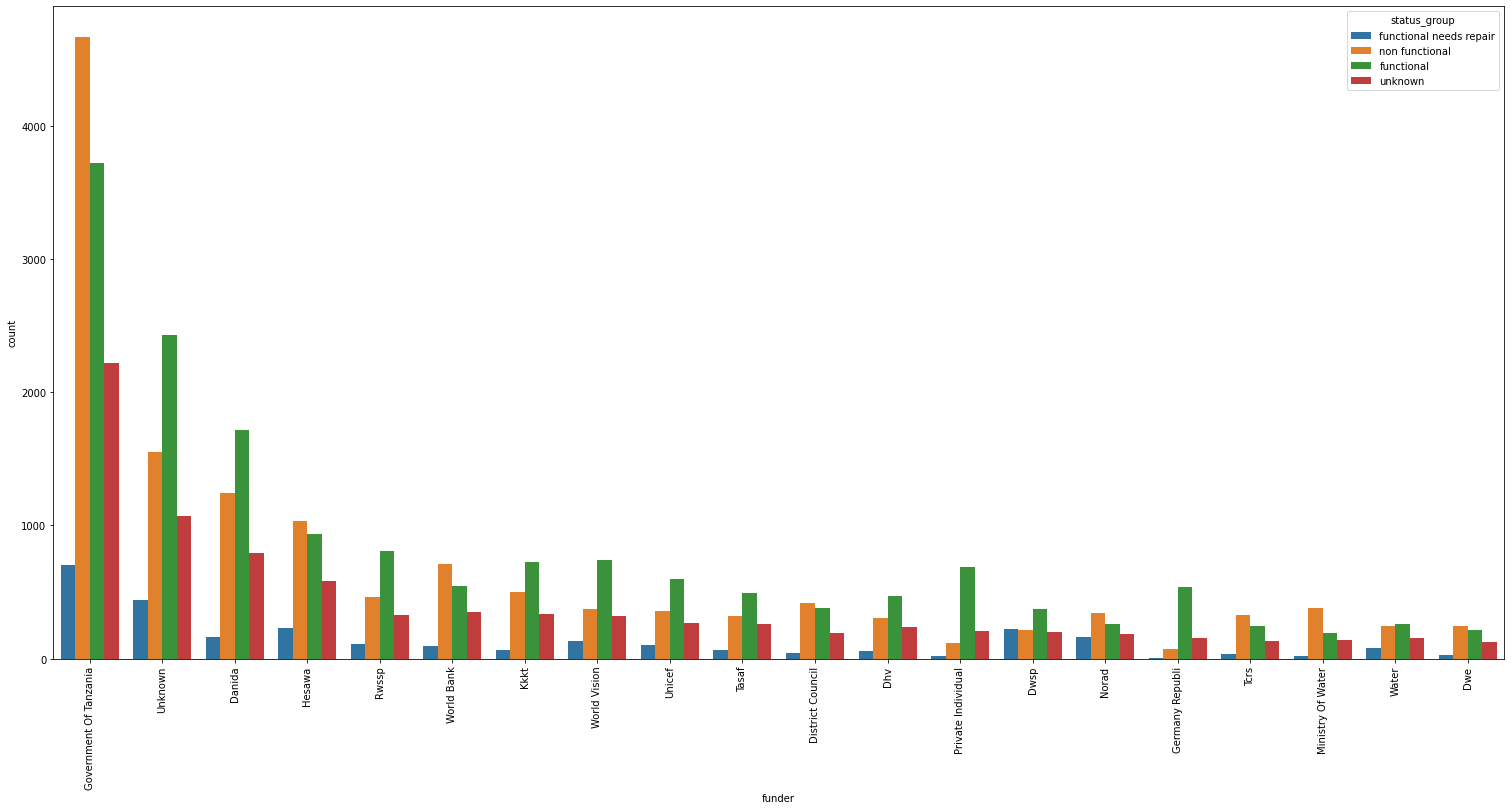

In [120]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=funder_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [121]:
tanzania_train_set_df['categorized_funder'] = tanzania_train_set_df['funder'] 

In [122]:
tanzania_train_set_df.loc[~tanzania_train_set_df["categorized_funder"].isin(['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision','Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi','Tcrs','Ministry Of Water','Water','Dwe']), "categorized_funder"] = "Others"

In [123]:
tanzania_train_set_df['categorized_funder'].nunique()

21

In [124]:
tanzania_train_set_df.drop(columns=['installer','funder'],inplace=True )

In [125]:
tanzania_train_set_df['status_group'] = tanzania_train_set_df['status_group'].replace( {'non functional': 0, 'functional': 1, 'functional needs repair': 2, 'unknown':-1})

In [126]:
tanzania_train_set_df['status_group'].value_counts()

 1    32259
 0    22824
-1    14850
 2     4317
Name: status_group, dtype: int64

In [127]:
tanzania_train_set_df

,gps_height,longitude,latitude,basin,region_code,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,decade,categorized_installer,categorized_funder
0,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,Mundindi,109,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,1,90s,Others,Others
1,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1,10s,Others,Others
2,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,1,00s,world vision,Others
3,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0,80s,Others,Unicef
4,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,Nyakasimbi,283,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1,00s,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,34,38.852669,-6.582841,Wami / Ruvu,6,1,Bagamoyo,Yombo,20,True,True,mono,vwc,never pay,soft,enough,river,communal standpipe,-1,80s,Others,Danida
74246,0,37.451633,-5.350428,Pangani,4,7,Kilindi,Mvungwe,2960,True,False,nira/tanira,vwc,annually,salty,insufficient,shallow well,hand pump,-1,90s,Others,Others
74247,1476,34.739804,-4.585587,Internal,13,2,Singida Rural,Ughandi,200,True,True,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,-1,10s,Unknown,Unknown
74248,998,35.432732,-10.584159,Lake Nyasa,10,2,Songea Rural,Maposeni,150,True,True,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,-1,00s,DWE,Others


In [128]:
train_set_df = tanzania_train_set_df.copy()

In [129]:
train_set_df.drop(columns=['lga','ward'],inplace=True )

In [130]:
tanzania_test_df.drop(columns=['lga','ward'],inplace=True )

In [131]:
train_set_df['permit'] = train_set_df['permit'].astype(bool).astype(int)

In [132]:
train_set_df['public_meeting'] = train_set_df['public_meeting'].astype(bool).astype(int)

In [133]:
train_set_df

,gps_height,longitude,latitude,basin,region_code,district_code,population,public_meeting,permit,extraction_type_group,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,decade,categorized_installer,categorized_funder
0,1390,34.938093,-9.856322,Lake Nyasa,11,5,109,1,0,gravity,vwc,annually,soft,enough,spring,communal standpipe,1,90s,Others,Others
1,1399,34.698766,-2.147466,Lake Victoria,20,2,280,1,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1,10s,Others,Others
2,686,37.460664,-3.821329,Pangani,21,4,250,1,1,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,1,00s,world vision,Others
3,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58,1,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0,80s,Others,Unicef
4,0,31.130847,-1.825359,Lake Victoria,18,1,283,1,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1,00s,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,34,38.852669,-6.582841,Wami / Ruvu,6,1,20,1,1,mono,vwc,never pay,soft,enough,river,communal standpipe,-1,80s,Others,Danida
74246,0,37.451633,-5.350428,Pangani,4,7,2960,1,0,nira/tanira,vwc,annually,salty,insufficient,shallow well,hand pump,-1,90s,Others,Others
74247,1476,34.739804,-4.585587,Internal,13,2,200,1,1,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,-1,10s,Unknown,Unknown
74248,998,35.432732,-10.584159,Lake Nyasa,10,2,150,1,1,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,-1,00s,DWE,Others


**One-hot encoding**

In [134]:
categorical_col = ['basin','extraction_type_group','management','payment_type','water_quality','quantity','source','waterpoint_type','decade','categorized_installer','categorized_funder']

In [135]:
numerical_col = ['gps_height','longitude','latitude','region_code','district_code','population','public_meeting','permit']

In [136]:
train_set_df = pd.get_dummies(train_set_df, prefix_sep="_", columns=categorical_col, drop_first=True)

In [137]:
train_set_df.head(4)

,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,status_group,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,...,decade_60s,decade_70s,decade_80s,decade_90s,categorized_installer_Community,categorized_installer_DANIDA,categorized_installer_DWE,categorized_installer_District council,categorized_installer_Fini Water,categorized_installer_Government,categorized_installer_HESAWA,categorized_installer_KKKT,categorized_installer_LGA,categorized_installer_Others,categorized_installer_RC Church,categorized_installer_RWE,categorized_installer_TCRS,categorized_installer_Unknown,categorized_installer_villagers,categorized_installer_world vision,categorized_funder_Dhv,categorized_funder_District Council,categorized_funder_Dwe,categorized_funder_Dwsp,categorized_funder_Germany Republi,categorized_funder_Government Of Tanzania,categorized_funder_Hesawa,categorized_funder_Kkkt,categorized_funder_Ministry Of Water,categorized_funder_Norad,categorized_funder_Others,categorized_funder_Private Individual,categorized_funder_Rwssp,categorized_funder_Tasaf,categorized_funder_Tcrs,categorized_funder_Unicef,categorized_funder_Unknown,categorized_funder_Water,categorized_funder_World Bank,categorized_funder_World Vision
0,1390,34.938093,-9.856322,11,5,109,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1399,34.698766,-2.147466,20,2,280,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,686,37.460664,-3.821329,21,4,250,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,263,38.486161,-11.155298,90,63,58,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [138]:
train_set_df.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 113 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   gps_height                                   74250 non-null  int64  
 1   longitude                                    74250 non-null  float64
 2   latitude                                     74250 non-null  float64
 3   region_code                                  74250 non-null  int64  
 4   district_code                                74250 non-null  int64  
 5   population                                   74250 non-null  int64  
 6   public_meeting                               74250 non-null  int64  
 7   permit                                       74250 non-null  int64  
 8   status_group                                 74250 non-null  int64  
 9   basin_Lake Nyasa                             74250 non-null  uint8  
 1

In [139]:
train1 = train_set_df.loc[(train_set_df['status_group'] != -1)]
test1 = train_set_df.loc[(train_set_df['status_group'] == -1)]
del test1['status_group']

In [140]:
train_set = train1.copy()
train_set.drop(columns=['status_group'],inplace=True )

In [141]:
X_independent = train_set
Y_dependent = train1['status_group']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_independent, Y_dependent, test_size=0.2, random_state=0)

**Feature Selection**

In [143]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Feature ranking:
1. feature 1 (0.127492)
2. feature 2 (0.125612)
3. feature 0 (0.066286)
4. feature 5 (0.047623)
5. feature 4 (0.039886)
6. feature 3 (0.036215)
7. feature 52 (0.034924)
8. feature 53 (0.024212)
9. feature 21 (0.021771)
10. feature 70 (0.018631)
11. feature 40 (0.016974)
12. feature 16 (0.016933)
13. feature 7 (0.013288)
14. feature 34 (0.013038)
15. feature 102 (0.012999)
16. feature 65 (0.012242)
17. feature 78 (0.011853)
18. feature 85 (0.011757)
19. feature 44 (0.011590)
20. feature 63 (0.010928)
21. feature 61 (0.010576)
22. feature 54 (0.010479)
23. feature 39 (0.010377)
24. feature 68 (0.010002)
25. feature 43 (0.009322)
26. feature 97 (0.009060)
27. feature 66 (0.008773)
28. feature 75 (0.008729)
29. feature 62 (0.008232)
30. feature 71 (0.008170)
31. feature 6 (0.008057)
32. feature 50 (0.008003)
33. feature 20 (0.007864)
34. feature 58 (0.007561)
35. feature 73 (0.007371)
36. feature 74 (0.007232)
37. feature 11 (0.006948)
38. feature 51 (0.006659)
39. feature

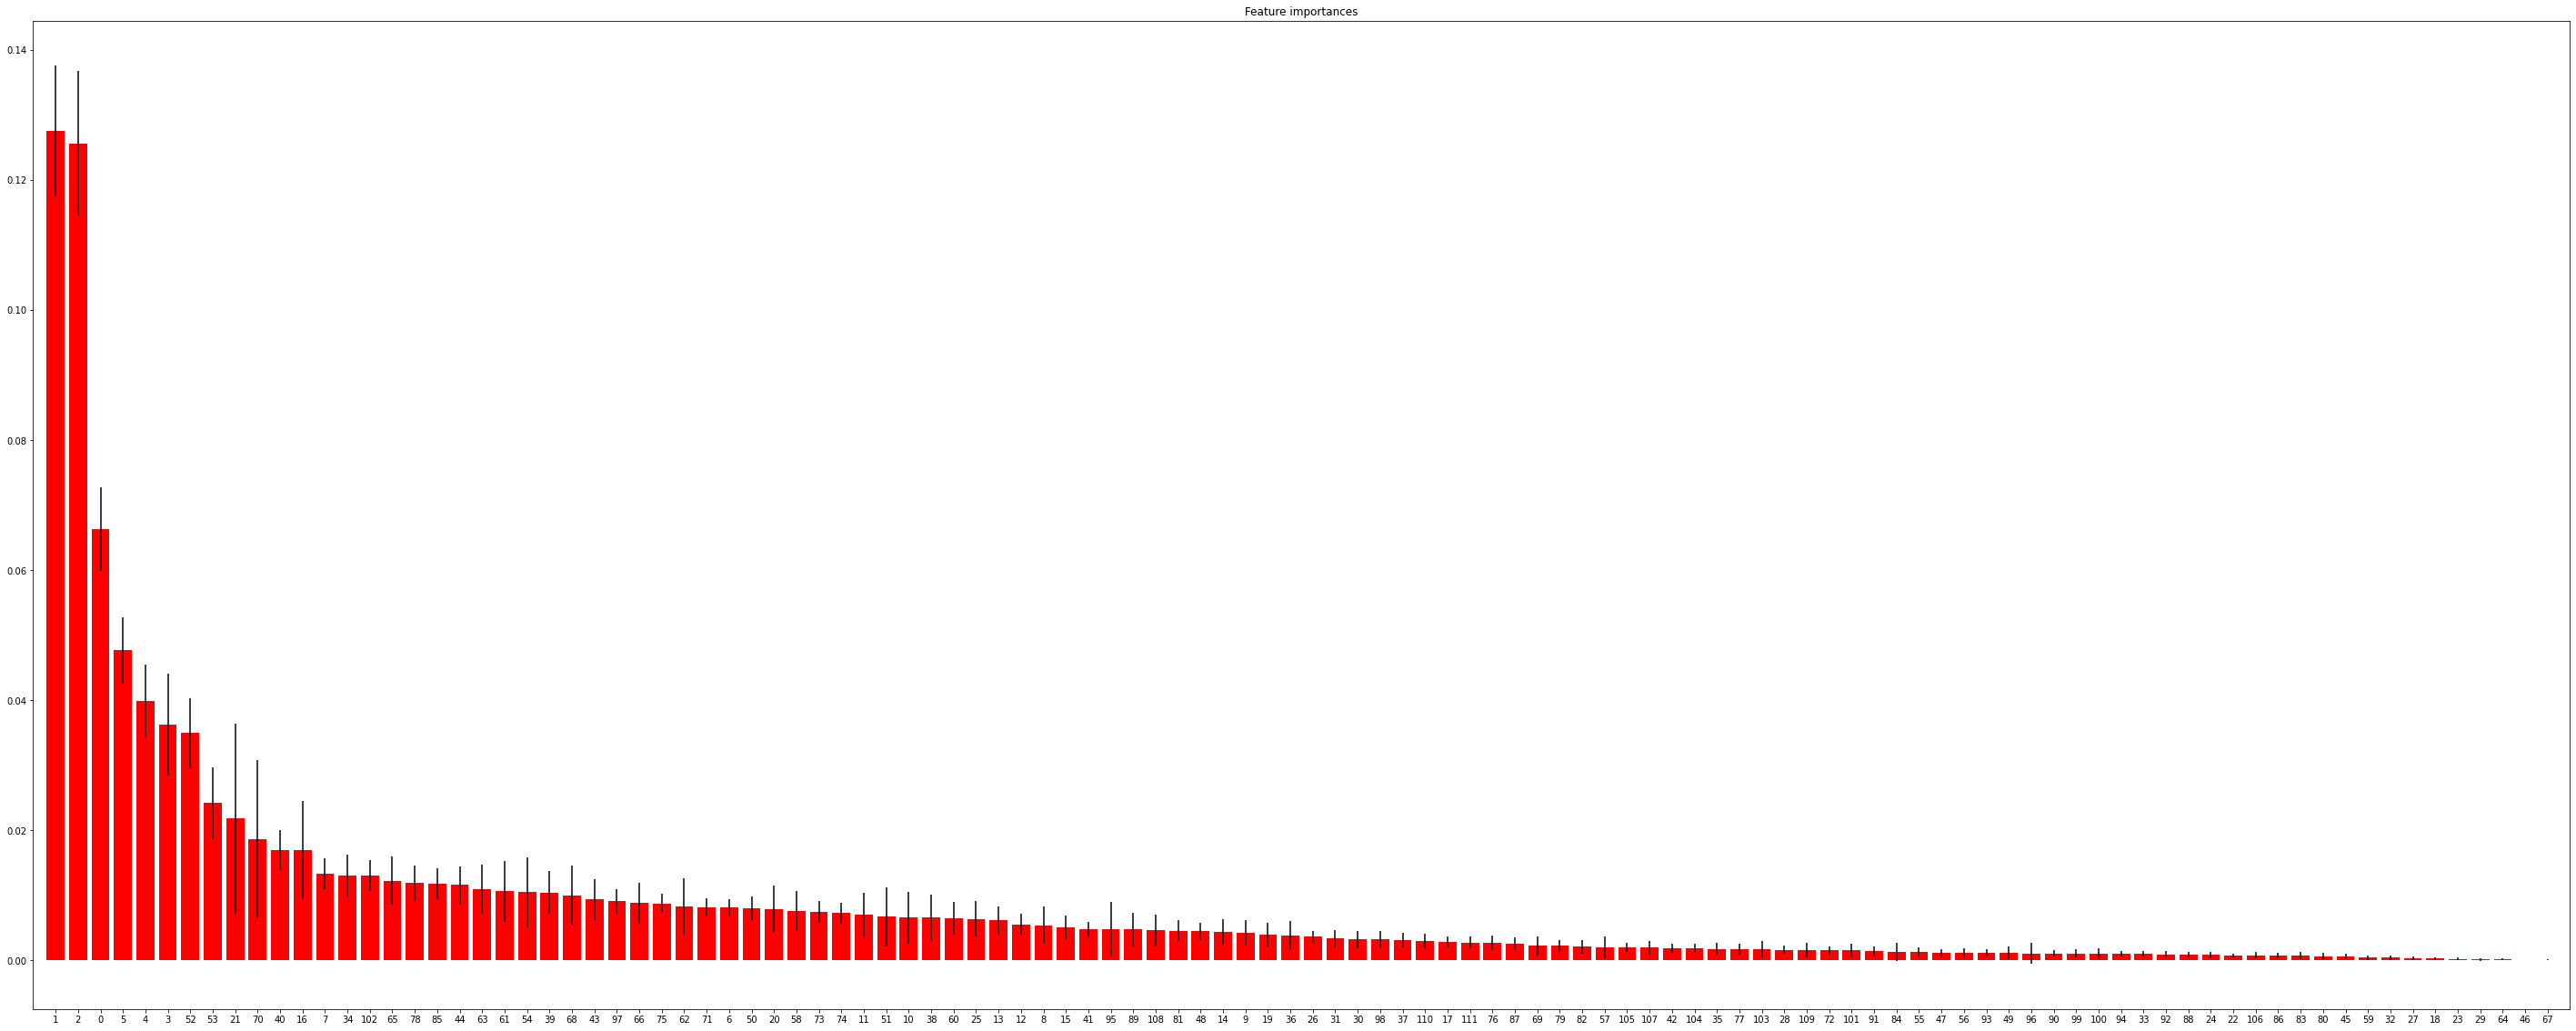

In [144]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_independent.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure(figsize=(50,20))
plt.title("Feature importances")
plt.bar(range(X_independent.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_independent.shape[1]), indices)
plt.xlim([-1, X_independent.shape[1]])
plt.show()

In [145]:
train_sample = train_set_df.copy()
train_sample.drop(columns=(numerical_col),inplace=True)
train_sample.drop(columns=['status_group'],inplace=True)
train_sample

,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,...,decade_60s,decade_70s,decade_80s,decade_90s,categorized_installer_Community,categorized_installer_DANIDA,categorized_installer_DWE,categorized_installer_District council,categorized_installer_Fini Water,categorized_installer_Government,categorized_installer_HESAWA,categorized_installer_KKKT,categorized_installer_LGA,categorized_installer_Others,categorized_installer_RC Church,categorized_installer_RWE,categorized_installer_TCRS,categorized_installer_Unknown,categorized_installer_villagers,categorized_installer_world vision,categorized_funder_Dhv,categorized_funder_District Council,categorized_funder_Dwe,categorized_funder_Dwsp,categorized_funder_Germany Republi,categorized_funder_Government Of Tanzania,categorized_funder_Hesawa,categorized_funder_Kkkt,categorized_funder_Ministry Of Water,categorized_funder_Norad,categorized_funder_Others,categorized_funder_Private Individual,categorized_funder_Rwssp,categorized_funder_Tasaf,categorized_funder_Tcrs,categorized_funder_Unicef,categorized_funder_Unknown,categorized_funder_Water,categorized_funder_World Bank,categorized_funder_World Vision
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74246,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
74247,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
74248,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [146]:
cat_col = train_sample.columns

**Random Forest**

In [148]:
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

numerical_transformer = make_pipeline(scaler)
categorical_transformer = make_pipeline(encoder)

preprocessor = ColumnTransformer(
      transformers=[('num', numerical_transformer, numerical_col),
                    ('cat', categorical_transformer, cat_col)])

# set rf with best grid search results
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9059974747474747
TEST: 0.7875420875420875

Balanced Accuracy:
TRAIN: 0.9192429609215651
TEST: 0.7105066317753647


In [150]:
# predictions on test set
y_pred_test = pipe.predict(test1)

**LGBM**

Accuracy:
TRAIN: 0.7891203703703704
TEST: 0.7816498316498316

Balanced Accuracy:
TRAIN: 0.6169691479118546
TEST: 0.6090436110911052


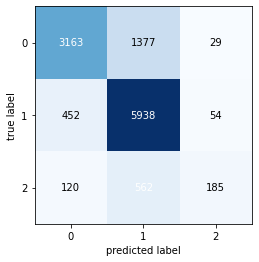

In [151]:
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 'min.error.idx', maximize = False,eta = .1,max_depth = 10, 
                      colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)

scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

numerical_transformer = make_pipeline(scaler)
categorical_transformer = make_pipeline(encoder)

preprocessor = ColumnTransformer(
      transformers=[('num', numerical_transformer, numerical_col),
                    ('cat', categorical_transformer, cat_col)])

#sending everthing in pipe
pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [152]:
# predictions on test set
y_pred_test = pipe.predict(test1)

**XGBoost**

Accuracy:
TRAIN: 0.8459385521885522
TEST: 0.8005050505050505

Balanced Accuracy:
TRAIN: 0.6841357028515933
TEST: 0.6256339716857503


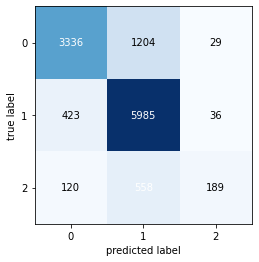

In [153]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [154]:
# make predictions on test set
y_pred_test = pipe.predict(test1)

**SMOTE**

In [155]:
df_for_smote = train_set_df.copy()

In [156]:
# encoding categorical columns
encoder = TargetEncoder()

for c in cat_col:
    df_for_smote[str(c) + '_encoded'] = encoder.fit_transform(df_for_smote[c].values, df_for_smote['status_group'])
    df_for_smote.drop(columns=c, inplace=True) 

In [157]:
# scaling numerical columns
scaler = preprocessing.RobustScaler()

def scaleColumns(df, numerical_col):
    for col in numerical_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_for_smote[col])),columns=[col])
    return df

scaled_df = scaleColumns(df_for_smote,[numerical_col])

In [158]:
scaled_df

,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,status_group,basin_Lake Nyasa_encoded,basin_Lake Rukwa_encoded,basin_Lake Tanganyika_encoded,basin_Lake Victoria_encoded,basin_Pangani_encoded,basin_Rufiji_encoded,basin_Ruvuma / Southern Coast_encoded,basin_Wami / Ruvu_encoded,extraction_type_group_gravity_encoded,extraction_type_group_india mark ii_encoded,extraction_type_group_india mark iii_encoded,extraction_type_group_mono_encoded,extraction_type_group_nira/tanira_encoded,extraction_type_group_other_encoded,extraction_type_group_other handpump_encoded,extraction_type_group_other motorpump_encoded,extraction_type_group_rope pump_encoded,extraction_type_group_submersible_encoded,extraction_type_group_swn 80_encoded,extraction_type_group_wind-powered_encoded,management_other_encoded,management_other - school_encoded,management_parastatal_encoded,management_private operator_encoded,management_trust_encoded,management_unknown_encoded,management_vwc_encoded,management_water authority_encoded,management_water board_encoded,management_wua_encoded,management_wug_encoded,...,decade_60s_encoded,decade_70s_encoded,decade_80s_encoded,decade_90s_encoded,categorized_installer_Community_encoded,categorized_installer_DANIDA_encoded,categorized_installer_DWE_encoded,categorized_installer_District council_encoded,categorized_installer_Fini Water_encoded,categorized_installer_Government_encoded,categorized_installer_HESAWA_encoded,categorized_installer_KKKT_encoded,categorized_installer_LGA_encoded,categorized_installer_Others_encoded,categorized_installer_RC Church_encoded,categorized_installer_RWE_encoded,categorized_installer_TCRS_encoded,categorized_installer_Unknown_encoded,categorized_installer_villagers_encoded,categorized_installer_world vision_encoded,categorized_funder_Dhv_encoded,categorized_funder_District Council_encoded,categorized_funder_Dwe_encoded,categorized_funder_Dwsp_encoded,categorized_funder_Germany Republi_encoded,categorized_funder_Government Of Tanzania_encoded,categorized_funder_Hesawa_encoded,categorized_funder_Kkkt_encoded,categorized_funder_Ministry Of Water_encoded,categorized_funder_Norad_encoded,categorized_funder_Others_encoded,categorized_funder_Private Individual_encoded,categorized_funder_Rwssp_encoded,categorized_funder_Tasaf_encoded,categorized_funder_Tcrs_encoded,categorized_funder_Unicef_encoded,categorized_funder_Unknown_encoded,categorized_funder_Water_encoded,categorized_funder_World Bank_encoded,categorized_funder_World Vision_encoded
0,0.779043,-0.055297,-0.928694,-0.083333,0.666667,-0.950820,0.0,-1.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.785877,-0.117749,0.553602,0.666667,-0.333333,-0.016393,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.244495,0.602967,0.231744,0.750000,0.333333,-0.180328,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.076689,0.870570,-1.178467,6.500000,20.000000,-1.229508,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.276386,-1.048796,0.615539,0.500000,-0.666667,0.000000,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,-0.250569,0.966210,-0.299253,-0.500000,-0

In [159]:
train1 = scaled_df.loc[(scaled_df['status_group'] != -1)]
test1 = scaled_df.loc[(scaled_df['status_group'] == -1)]
del test1['status_group']

In [160]:
train_set = train1.copy()
train_set.drop(columns=['status_group'],inplace=True )

In [161]:
X = train_set
y = train1['status_group']

In [162]:
# making over-sampling 
smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_sample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

1    32259
0    22824
2     4317
Name: status_group, dtype: int64
2    32259
1    32259
0    32259
dtype: int64


In [163]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

In [164]:
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)


xgb_smote.fit(X_train, y_train)

# predictions of training set
y_pred = xgb_smote.predict(X_train)

# redictions of test set
y_pred_test = xgb_smote.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9655390656281887
TEST: 0.8638665013432527

Balanced Accuracy:
TRAIN: 0.9655324244183566
TEST: 0.8639998019463088


In [165]:
# predictions of test set
y_pred_test = xgb_smote.predict(test1.values)

In [166]:
y_pred_test

array([1, 2, 1, ..., 1, 1, 0])

In [167]:
y_pred_test.shape

(14850,)

In [168]:
results = pd.DataFrame()
results["id"] = tanzania_test_df.id
results["status_group"] = y_pred_test
results["status_group"] = results["status_group"].map({0: 'non functional', 1: 'functional', 2: 'functional needs repair'})
results.to_csv('status_output.csv', index=False)

**Finding best important features of categorical columns**

In [169]:
train_set_1 = train_set.copy()
train_set_1.drop(columns=(numerical_col),inplace=True)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_independent, Y_dependent, test_size=0.2, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Feature ranking:
1. feature 1 (0.127492)
2. feature 2 (0.125612)
3. feature 0 (0.066286)
4. feature 5 (0.047623)
5. feature 4 (0.039886)
6. feature 3 (0.036215)
7. feature 52 (0.034924)
8. feature 53 (0.024212)
9. feature 21 (0.021771)
10. feature 70 (0.018631)
11. feature 40 (0.016974)
12. feature 16 (0.016933)
13. feature 7 (0.013288)
14. feature 34 (0.013038)
15. feature 102 (0.012999)
16. feature 65 (0.012242)
17. feature 78 (0.011853)
18. feature 85 (0.011757)
19. feature 44 (0.011590)
20. feature 63 (0.010928)
21. feature 61 (0.010576)
22. feature 54 (0.010479)
23. feature 39 (0.010377)
24. feature 68 (0.010002)
25. feature 43 (0.009322)
26. feature 97 (0.009060)
27. feature 66 (0.008773)
28. feature 75 (0.008729)
29. feature 62 (0.008232)
30. feature 71 (0.008170)
31. feature 6 (0.008057)
32. feature 50 (0.008003)
33. feature 20 (0.007864)
34. feature 58 (0.007561)
35. feature 73 (0.007371)
36. feature 74 (0.007232)
37. feature 11 (0.006948)
38. feature 51 (0.006659)
39. feature

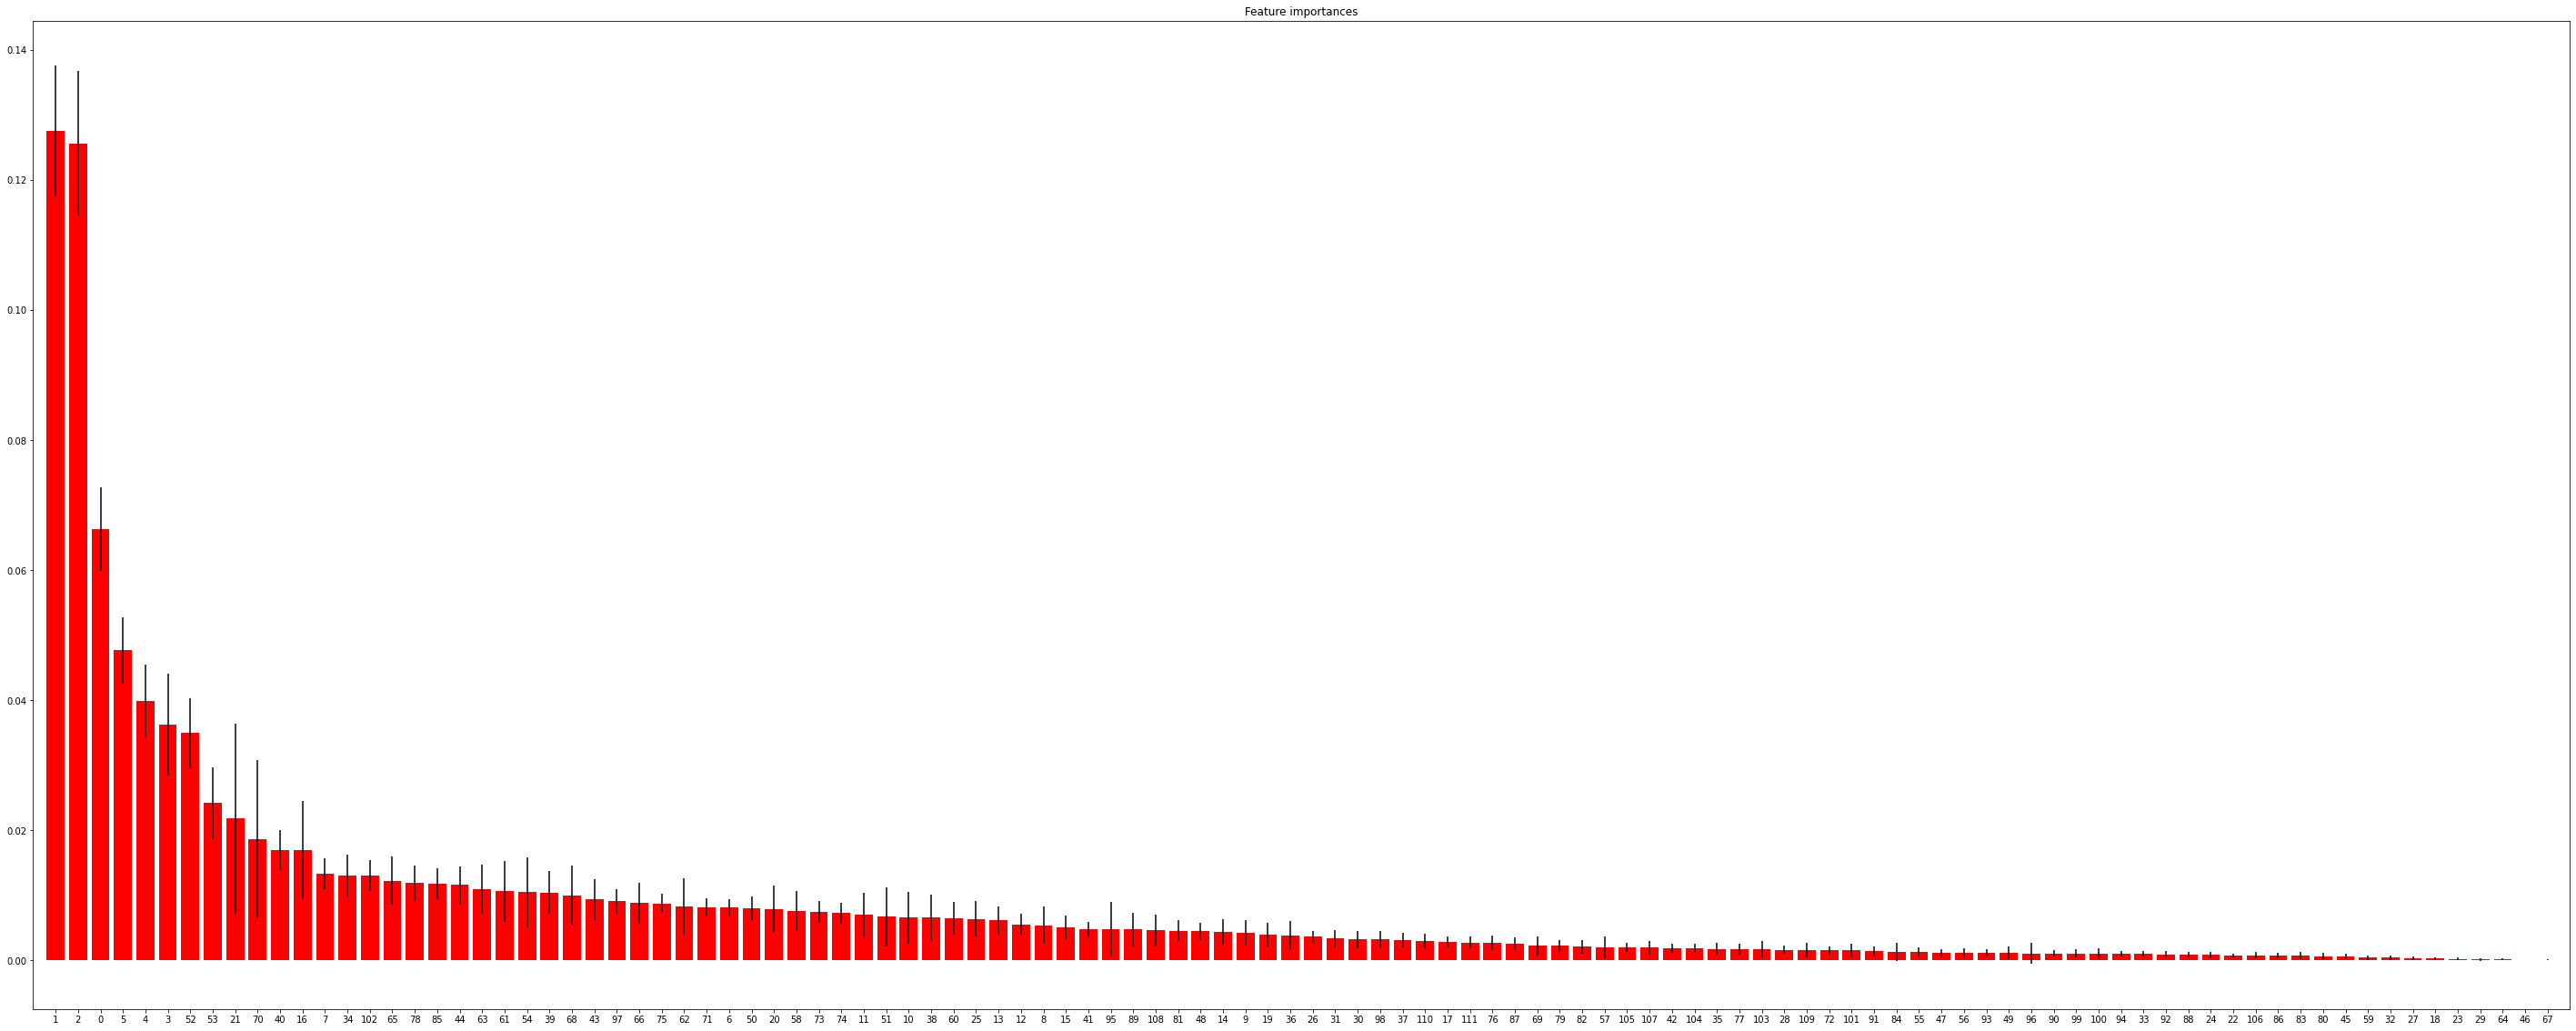

In [172]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_independent.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure(figsize=(50,20))
plt.title("Feature importances")
plt.bar(range(X_independent.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_independent.shape[1]), indices)
plt.xlim([-1, X_independent.shape[1]])
plt.show()